# High Rated Games

Google Play Store serves as the official app store for the Android operating system, allowing users to browse and download applications. Success of an app is largely determined by its ratings.

But is there any particular pattern among high rated apps? Does size or genre of the app play a role in determining its high rating? 

Let's find out.


## Problem Statement

Conduct an EDA on the Google Play Store data and try to explore whether given the data, ratings of an can be predicted


## About the Dataset

The snapshot of the data you will be working on:

![playstore_date](../images/gps_data.PNG)


The dataset has details of 10841 apps with following 13 features

|Feature|Description|
|-----|-----|
|App |Name of the app |
|Category|Category the app broadly belongs to|
|Rating|Customer rating of the app|
|Size|Size of the app|
|Installs|Number of Installs done for the app|
|Type|Type of the app(Free/Paid)|
|Price|Price of the app(if any)|
|Content Rating|What age group is the app appropriate for|
|Genre|What all genres the app belongs to|
|Last Updated|Date on which the app was last updated|
|Current Ver|Version of the app|
|Android Ver|Android Version required by the device to the run the app|


## Why solve this project ?

After completing this project, you will have a better understanding of certain methods of EDA and Data Preprocessing. In this project, you will apply the following concepts.




# Data Loading

The first task is data loading.

* Load the dataset from `'path'`(given) and store it in a variable called `'data'`.


### Exploration Instructions

* Plot a histogram of `Ratings` column to see the distribution of app ratings

### Observation 

* You can see from the plotted histogram that there exists `ratings>5` which shouldn't be there

### Cleaning Instructions

* Subset the dataframe `'data'` such that it only contains rows where `Rating` is less than or equal to `5`. Save the subsetted dataframe back into `'data'`.


* Plot a histogram of `Ratings` column again to see the distribution of app ratings

### Observation

* Average rating of application in store is around 4 which is very high

# Hint

You can subset the dataframe by rating by writing code similar to :

`"data=data[data['Rating']<=5]"`


# Test Cases

data.loc[50][1]=="AUTO_AND_VEHICLES"


data.loc[100][2]==4.7

#After subset

data.shape==(9366, 13)


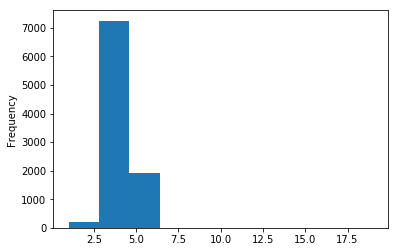

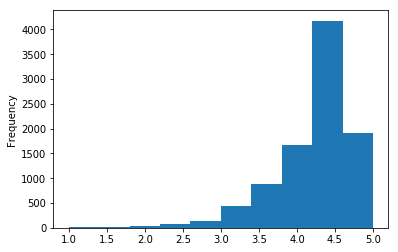

In [5]:
#Importing header files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


path='../data/googleplaystore.csv'

#Code starts here

#Loading the data
data=pd.read_csv(path)

#Plotting histogram of Rating
data['Rating'].plot(kind='hist')

plt.show()


#Subsetting the dataframe based on `Rating` column
data=data[data['Rating']<=5]

#Storing the value counts of `Rating`
ratings=data['Rating'].value_counts()

#Plotting histogram of Rating
data['Rating'].plot(kind='hist')   

#Code ends here

# Success Message

Congrats! You have successfully loaded the data and plotted the ratings column.

# Null Value Treatment


### Exploration Instructions

* Create a series containing count of null values of each column using `"data.isnull().sum()"`  and store it in a variable called `'total_null'`

* Create a series containing percentage of null values out of total values of each column by using `"(total_null/data.isnull().count())"` and store it in a variable called `'total_null'`


* Concatenate `'total_null'` and `'percent_null'` along column axis(axis=1) with keys=['Total','Percent'] and save it in a variable called `'missing_data'`


* Print `'missing_data'`


### Observation

* There are null values in only two columns and that too in very few rows. We can straight off drop the null values.


### Cleaning Instructions

* Drop the null values from `'data'`


* After dropping, create two variables `'total_null_1'` and `'percent_null_1'` in a similar way to `'total_null'` and `'percent_null'`


* Concatenate `'total_null_1'` and `'percent_null_1'` along column axis(axis=1) with keys=['Total','Percent'] and save it in a variable called `'missing_data_1'`


* Print `'missing_data_1'`

### Observation

* There are no null values left in the data.


# Hints

You can concatenate `total` and `percent` using `"pd.concate()"` function

 
# Test Cases

#missing_data

missing_data.shape==(13,2)

missing_data['Total'][12]==2

missing_data['Total'][11]==4

#missing_data_1

missing_data_1.shape==(13,2)

missing_data_1['Total'][12]==0

missing_data_1['Total'][11]==0

In [6]:
#Code starts here

#Sum of null values of each column
total_null = data.isnull().sum()

#Percentage of null values of each column
percent_null = (total_null/data.isnull().count())

#Concatenating total_null and percent_null values
missing_data = pd.concat([total_null, percent_null], axis=1, keys=['Total', 'Percent'])

print(missing_data)

#Dropping the null values
data.dropna(inplace = True)

#Sum of null values of each column
total_null_1 = data.isnull().sum()

#Percentage of null values of each column
percent_null_1 = (total_null_1/data.isnull().count())

#Concatenating total_null and percent_null values
missing_data_1 = pd.concat([total_null_1, percent_null_1], axis=1, keys=['Total', 'Percent'])

print(missing_data_1)

#Code ends here

                Total   Percent
App                 0  0.000000
Category            0  0.000000
Rating              0  0.000000
Reviews             0  0.000000
Size                0  0.000000
Installs            0  0.000000
Type                0  0.000000
Price               0  0.000000
Content Rating      0  0.000000
Genres              0  0.000000
Last Updated        0  0.000000
Current Ver         4  0.000427
Android Ver         2  0.000214
                Total  Percent
App                 0      0.0
Category            0      0.0
Rating              0      0.0
Reviews             0      0.0
Size                0      0.0
Installs            0      0.0
Type                0      0.0
Price               0      0.0
Content Rating      0      0.0
Genres              0      0.0
Last Updated        0      0.0
Current Ver         0      0.0
Android Ver         0      0.0


# Success Message

Congrats! You have successfully removed all the null values from the data.

# Category vs Rating

Let's first check if category and ratings have any sort of relation


### Exploration Instructions

* Using seaborn, plot the `catplot` where `x="Category"`,`y="Rating"`,`data=data`, `kind="box"` and  `height = 10`.


* Rotate the x-axis labels by 90<sup>o</sup>


* Title the plot as `Rating vs Category [BoxPlot]`


### Observation

Rating of application in each category don't vary with each other much.


# Hints

You can rotate the x-axis label using `"sns.set_xticklabels(rotation=90)"`

# Test Cases



Text(0.5,1,'Rating vs Category [BoxPlot]')

<Figure size 720x720 with 0 Axes>

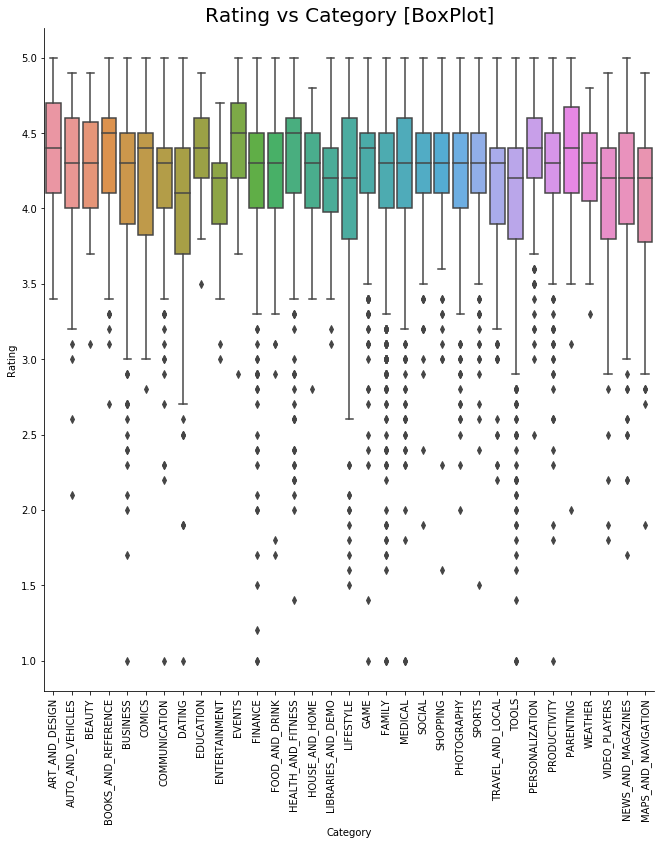

In [3]:
#Category vs Rating

#Code starts here

#Setting the figure size
plt.figure(figsize=(10,10))

#Plotting boxplot between Rating and Category
cat= sns.catplot(x="Category",y="Rating",data=data, kind="box", height = 10)

#Rotating the xlabel rotation
cat.set_xticklabels(rotation=90)

#Setting the title of the plot
plt.title('Rating vs Category [BoxPlot]',size = 20)

#Code ends here

# Success Message

Congrats! You have successfully compared `Rating` with `Category`

# Installs vs Ratings

### Exploration Instructions

* Print value counts of `Installs` column of `'data'` to see its distribution

### Observations

* The column `Installs` is not of type `int`


* The values have a large range(0- 500M)

### Cleaning Instructions

* Remove `,` and `+` from `Installs` column of `'data'`.


* Convert the `Installs` column to datatype `int`


* Create a labelencoder object named `'le'` using `"sklearn"` and transform the values of `Installs` column(Why are we doing this?)


* Using seaborn, plot the `regplot` where `x="Installs"`, `y="Rating"` and `data=data`. 


* Title the plot as `Rating vs Installs [RegPlot]` 


### Observations

* There is but a small positive correlation between number of installs and ratings 



# Hint

You can remove `+` from the column values by writing code similar to:
`"data['Installs']=data['Installs'].str.replace('+','')"`

Similarly for `,`

You can convert the column to integer by using `astype()` function



# Test Cases

data['Installs'][1]==11

data['Installs'][50]==12

C:\ProgramData\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Rating vs Installs[RegPlot]')

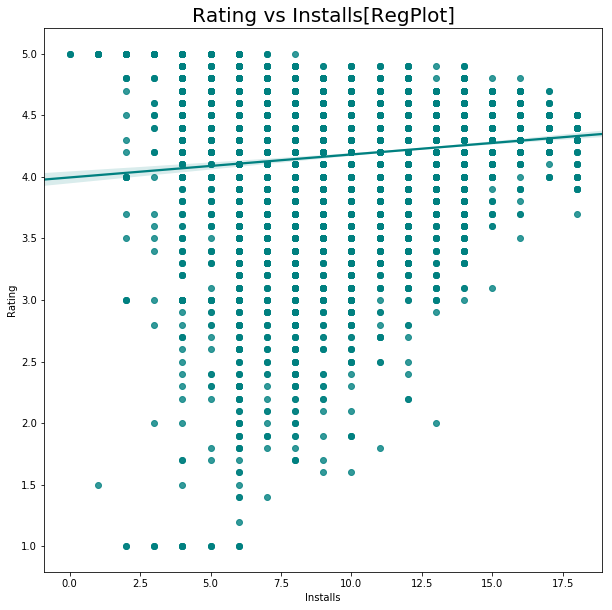

In [4]:
#Importing header files
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

#Code starts here

#Removing `,` from the column
data['Installs']=data['Installs'].str.replace(',','')

#Removing `+` from the column
data['Installs']=data['Installs'].str.replace('+','')

#Converting the column to `int` datatype
data['Installs'] = data['Installs'].astype(int)

#Creating a label encoder object
le=LabelEncoder()

#Label encoding the column to reduce the effect of a large range of values
data['Installs']=le.fit_transform(data['Installs'])

#Setting figure size
plt.figure(figsize = (10,10))

#Plotting Regression plot between Rating and Installs
sns.regplot(x="Installs", y="Rating", color = 'teal',data=data)

#Setting the title of the plot
plt.title('Rating vs Installs[RegPlot]',size = 20)

#Code ends here

# Success Message

Congrats! You have successfully cleaned the `Installs` column and compared it with `Ratings`

# Price vs Ratings

### Exploration Instructions

* Print value counts of `Price` column of `'data'` to see its distribution

### Observations

* The column `Price` is not of type `int`


* Majority of the values is `0`(More than 90%)


### Cleaning Instructions

* Remove dollar sign from `Price` column of `'data'`.


* Convert the `Price` column to datatype `float`


* Using seaborn, plot the `regplot` where `x="Price"`, `y="Rating"` and `data=data`. 


* Title the plot as `Rating vs Price [RegPlot]` 


### Observations

* There is a negative correlation between price and ratings. Higher price application may make customer disappointed, if they are not good enough.
 



# Hints

You can remove dollar sign from the column values by writing code similar to:
`"data['Price'] = data['Price'].str.replace('$','')"`


You can convert the column to integer by using `astype()` function



# Test Cases


data['Price'][1]==0.0

data['Price'][235]==4.99

C:\ProgramData\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Rating vs Price[Reg Plot]')

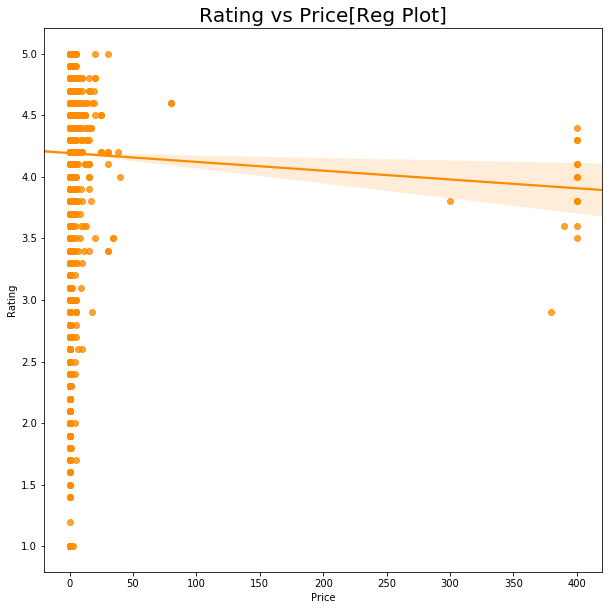

In [5]:
#Code starts here

#Removing the dollar sign from the column
data['Price'] = data['Price'].str.replace('$','')

#Converting the column to float
data['Price'] = data['Price'].astype(float)

#Setting the figure size
plt.figure(figsize = (10,10))

#Plotting Regression plot between Rating and Price
sns.regplot(x="Price", y="Rating", color = 'darkorange',data=data)

#Setting the plot title
plt.title('Rating vs Price[Reg Plot]',size = 20)

#Code ends here

# Success Message

Congrats! You have successfully cleaned the `Price` column and compared it with `Ratings`

#  Genre vs Rating

### Exploration Instruction


* Try and see the unique values of the column `Genre` using `"unique()"`

                    
                      
                                  Example of unique() function
***

~~~python

#Creation of a series
ser=pd.Series([2, 1, 3, 3], name='A')

print("The Series")
print(ser)

print('-'*10)

print("The unique elements")
print(ser.unique())

~~~

**Output**

~~~python
The Series
0    2
1    1
2    3
3    3
Name: A, dtype: int64
----------
The unique elements
[2 1 3]
~~~

***
### Observations

* The column `Genre` has 115 unique values


* Some of the apps have multiple genres hence resulting in 115 unique combinations

### Cleaning Instructions


* For better ..., let's keep only one Genre per app. Split the values of column `Genres` by `;` character and store only the first genre back in `Genres` column.


* Group `Genres` and `Rating` by `Genres` and store its mean in a variable called `'gr_mean'`  


* Print the statistics of `'gr_mean'` using `describe()"` function


* Sort the values of `'gr_mean'` by `Ratings` using `"sort_values()"` function and save it back to `'gr_mean'`


* Print the first and last value of `gr_mean`

### Observations

* The lowest of average rating on genres (Dating) is 3.97 


* The highest of average rating on genres (Events) is 4.43


* Owing to Standard Deviation of 0.1, seems like genre doesn't have much effect on rating



# Hints

Groupby `Genres` and `Rating` by their mean by writing code similar to 

`"data[['Genres', 'Rating']].groupby(['Genres'], as_index=False).mean()"`


# Test Cases


gr_mean.iloc[0,0]=='Dating'

gr_mean.iloc[47,0]=='Events'


In [6]:
#Genre vs Rating

#Code starts here

#Finding the length of unique genres
print( len(data['Genres'].unique()) , "genres")

#Splitting the column to include only the first genre of each app
data['Genres'] = data['Genres'].str.split(';').str[0]

#Grouping Genres and Rating
gr_mean=data[['Genres', 'Rating']].groupby(['Genres'], as_index=False).mean()

print(gr_mean.describe())

#Sorting the grouped dataframe by Rating
gr_mean=gr_mean.sort_values('Rating')

print(gr_mean.head(1))

print(gr_mean.tail(1))

#Code ends here

115 genres
          Rating
count  48.000000
mean    4.212486
std     0.104071
min     3.970769
25%     4.132114
50%     4.204821
75%     4.286532
max     4.435556
    Genres    Rating
14  Dating  3.970769
    Genres    Rating
18  Events  4.435556


# Success Message

Congrats! You have successfully compared `Rating` with `Genre`

# Last Updated vs Rating


### Exploration Instructions
* Print and visualise the values of `Last Updated` column of `'data'`


### Observations

* `Last Updated` is not of the `date` type.


### Cleaning Instructions

* Convert `Last Updated` to datetime format


* Find out the max value in `Last Updated` column and save it a variable called `'max_date'` 


* Create new column `Last Updated Days` which is the difference between `max_date` and values of column `Last Updated` in days using `"dt.days"` function



                               Example of dt.days() function
***
~~~python
#Series Containing Dates
print('The Date Series:')
print(Dates.head(2))
print('-'*50)
#Creating a new variable 
Diff_dates= Dates-pd.to_datetime(2018-11-10)

print('The Date Difference:')
print(Diff_dates.head(2))
print('-'*50)

print('The Date Difference by days:')
print((Diff_dates.head(2).dt.days))
print('-'*50)
~~~

**Output**

~~~python
The Date Series:
0   '2018-01-07'
1   '2018-01-15'
Name: Last Updated, dtype: datetime64[ns]
--------------------------------------------------
The Date Difference Series:
0   17537 days 23:59:59.999998
1   17545 days 23:59:59.999998
Name: Last Updated, dtype: timedelta64[ns]
--------------------------------------------------
The Date Difference by days:
0    17537
1    17545
Name: Last Updated, dtype: int64
--------------------------------------------------
~~~
***


* Using seaborn, plot the `regplot` where `x="Last Updated Days"`, `y="Rating"`, `data=data` 



* Title the plot as `Rating vs Last Updated [RegPlot]`  
                 
### Observations

* Higher the gap between the days last updated, lower the rating

# Hints

You can convert data['Last Updated'] to date format using `pd.to_datetime()` function


# Test cases

data['Last Updated'].astype(str)[0]=='2018-01-07'


data['Last Updated Days'][0]==213

data['Last Updated Days'][100]==85

C:\ProgramData\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Rating vs Last Updated [RegPlot]')

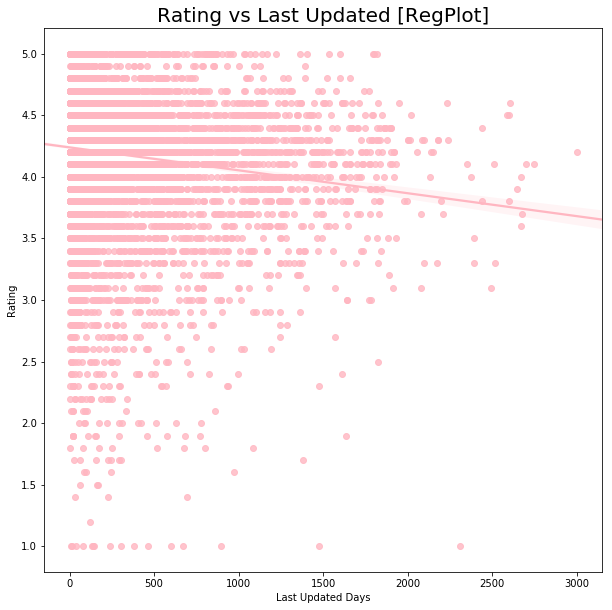

In [7]:
#Last Updated vs Rating

#Code starts here

#Converting the column into datetime format
data['Last Updated'] = pd.to_datetime(data['Last Updated'])

#Creating new column having `Last Updated` in days
data['Last Updated Days'] = (data['Last Updated'].max()-data['Last Updated'] ).dt.days 

#Setting the size of the figure
plt.figure(figsize = (10,10))

#Plotting a regression plot between `Rating` and `Last Updated Days`
sns.regplot(x="Last Updated Days", y="Rating", color = 'lightpink',data=data )

#Setting the title of the plot
plt.title('Rating vs Last Updated [RegPlot]',size = 20)

#Code ends here

# Success Message

Congrats! You have successfully created a new column `Last Updated Days` and compared it with `Ratings`


Congrats! You also have successfully completed the exploratory data analysis on the Google Play Store data. Based on your findings, following should be the things to ponder upon?
```
* Is the data clean enough that it can be fed to a ML Model?

* Are the data features sufficient enough for us to create a ML model to predict ratings of an app?

* If given the data to you by a firm, what other use cases do you think can be made from it?

```

# END OF ASSESMENT

In [11]:
#Demo of unique function

#Creation of a series
ser=pd.Series([2, 1, 3, 3], name='A')

print("The Series")
print(ser)

print('-'*10)

print("The unique elements")
print(ser.unique())


The Series
0    2
1    1
2    3
3    3
Name: A, dtype: int64
----------
The unique elements
[2 1 3]


In [22]:
#Demo of dt.days() function

Dates = pd.to_datetime(data['Last Updated'])

#Series Containing Dates
print('The Date Series:')
print(Dates.head(2))
print('-'*50)
#Creating a new variable 
Diff_dates= Dates-pd.to_datetime(2018-11-10)

print('The Date Difference:')
print(Diff_dates.head(2))
print('-'*50)

print('The Date Difference by days:')
print((Diff_dates.head(2).dt.days))
print('-'*50)

The Date Series:
0   2018-01-07
1   2018-01-15
Name: Last Updated, dtype: datetime64[ns]
--------------------------------------------------
The Date Difference:
0   17537 days 23:59:59.999998
1   17545 days 23:59:59.999998
Name: Last Updated, dtype: timedelta64[ns]
--------------------------------------------------
The Date Difference by days:
0    17537
1    17545
Name: Last Updated, dtype: int64
--------------------------------------------------
